In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/home/sunbeam/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('Grocery_std.csv')
df.head()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Create hierarchical cluster

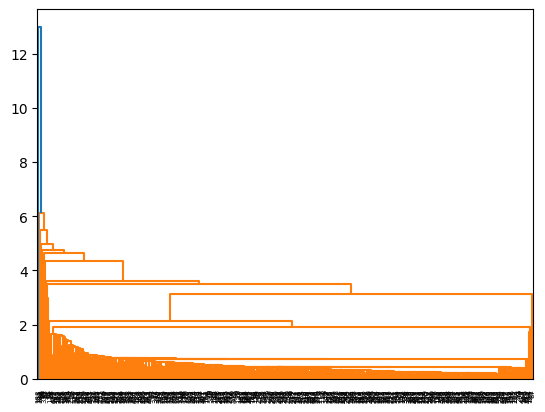

In [4]:
from scipy.cluster import hierarchy
link = hierarchy.linkage(df, 'single')
dendo = hierarchy.dendrogram(link)

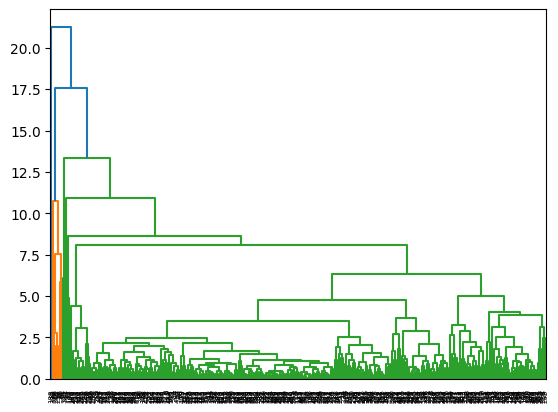

In [5]:
link = hierarchy.linkage(df, 'complete')
dendo = hierarchy.dendrogram(link)

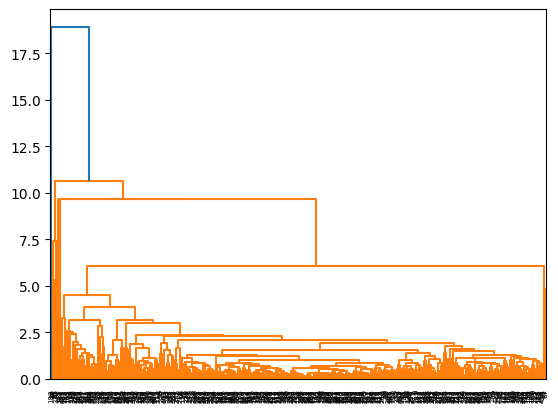

In [6]:
link = hierarchy.linkage(df,'average')
dendo = hierarchy.dendrogram(link)

## Use ski-kit Learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

mod = AgglomerativeClustering(n_clusters=8, linkage='average')
mod.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [8]:
mod.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

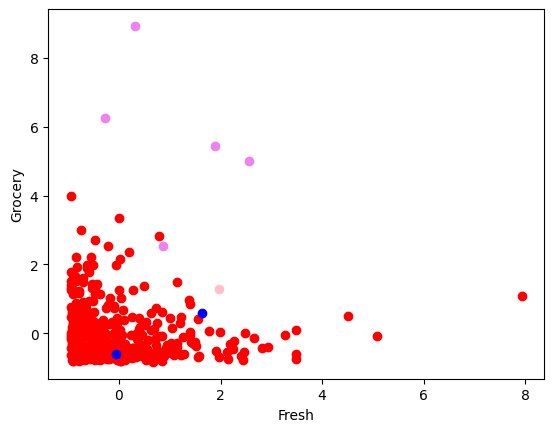

In [9]:
figure = plt.figure()

colors = ['red','blue','violet','pink']
for k in range(len(colors)):
    plt.scatter(df['Fresh'][mod.labels_==k], df['Grocery'][mod.labels_==k], color=colors[k])
    plt.xlabel('Fresh')
    plt.ylabel('Grocery')

## create DBSCAN model

In [10]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=4, min_samples=4)
model.fit(df)

DBSCAN(eps=4, min_samples=4)

In [11]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

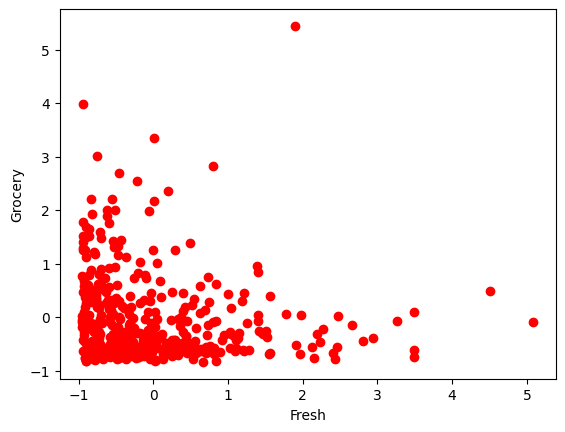

In [12]:
figure = plt.figure()

colors = ['red','blue','violet','pink']
for k in range(len(colors)):
    plt.scatter(df['Fresh'][model.labels_==k], df['Grocery'][model.labels_==k], color=colors[k])
    plt.xlabel('Fresh')
    plt.ylabel('Grocery')